In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import librosa
from tqdm import tqdm_notebook as tqdm
import json
import pandas as pd
import pickle
import os
import h5py
import collections as cl
from ast import literal_eval
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score
from sklearn.preprocessing import StandardScaler
import random
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from deem import deem

In [2]:
param_grid = {'LR_param': {'C':[10**k for k in range(-10, 6, 2)]}, 'scoring': 'roc_auc', 'cv': 3, 'random_state': 42}

with open("genre_map.json", "r") as f: # only consider 10 classes of Openmic dataset
    genre_map = json.load(f)
aligned_genre = list(genre_map)[:-1]

with open("instrument_map.json", "r") as f: # only consider 10 classes of Openmic dataset
    instrument_map = json.load(f)

## VGGish

In [3]:
embedding = 'vggish'
debias_method = ''

deb = deem(embedding = embedding, debias_method = debias_method, feature_dir='./embeddings.h5', 
           instrument_map=instrument_map, genre_map=genre_map, param_grid=param_grid)

A_meta = pd.read_csv("A_meta.csv")
A_feature = deb.load_feature(A_meta)
B_meta = pd.read_csv("B_meta.csv")
B_feature = deb.load_feature(B_meta)

deb.instrument_classfication(train_set='A', test_set='A', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='A', test_set='B', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='B', test_set='B', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='B', test_set='A', A_feature=A_feature, B_feature=B_feature)

deb.result_all.to_csv('results/results_' + embedding + debias_method + '.csv', index=False)
result_all = deb.result_all

100%|██████████| 6705/6705 [00:01<00:00, 4554.21it/s]


(6705, 128) (6705,)


100%|██████████| 6705/6705 [00:01<00:00, 4242.62it/s]


(6705, 128) (6705,)
Train on A, test on A


100%|██████████| 11/11 [01:09<00:00,  6.29s/it]


Train on A, test on B


100%|██████████| 11/11 [01:13<00:00,  6.67s/it]


Train on B, test on B


100%|██████████| 11/11 [01:05<00:00,  5.97s/it]


Train on B, test on A


100%|██████████| 11/11 [01:18<00:00,  7.10s/it]


In [4]:
debias_method = '-lda'

deb.debias_method = debias_method

deb.instrument_classfication(train_set='A', test_set='A', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='A', test_set='B', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='B', test_set='B', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='B', test_set='A', A_feature=A_feature, B_feature=B_feature)

deb.result_all.to_csv('results/results_' + embedding + debias_method + '.csv', index=False)
result_all = result_all.append(deb.result_all)

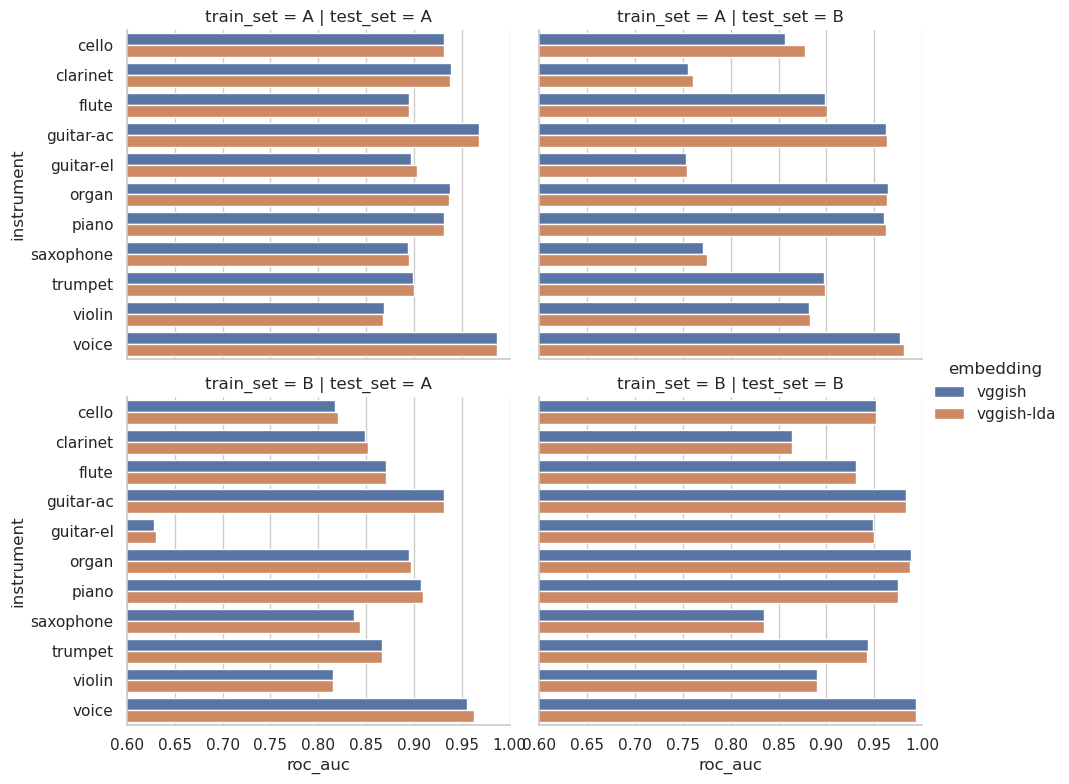

In [8]:
embedding = 'vggish'; debias_method = ''
df1 = pd.read_csv('results/results_' + embedding + debias_method + '.csv')
debias_method = '-lda'
df2 = pd.read_csv('results/results_' + embedding + debias_method + '.csv')

result_all = df1.append(df2).reset_index(drop=True)
sns.set_theme(context='notebook', style='whitegrid', palette='deep')

sns.catplot(data=result_all, row='train_set', col='test_set', y='instrument', x='roc_auc', hue='embedding', kind='bar', 
            height=4, aspect=1.2, ci=None)
plt.xlim([0.6,1])
plt.savefig('results/' + embedding  + debias_method + '.pdf', bbox_inches='tight')

## OpenL3

In [21]:
embedding = 'openl3'
debias_method = ''

deb = deem(embedding = embedding, debias_method = debias_method, feature_dir='./embeddings.h5', 
           instrument_map=instrument_map, genre_map=genre_map, param_grid=param_grid)

A_meta = pd.read_csv("A_meta.csv")
A_feature = deb.load_feature(A_meta)
B_meta = pd.read_csv("B_meta.csv")
B_feature = deb.load_feature(B_meta)

deb.instrument_classfication(train_set='A', test_set='A', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='A', test_set='B', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='B', test_set='B', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='B', test_set='A', A_feature=A_feature, B_feature=B_feature)

deb.result_all.to_csv('results/results_' + embedding + debias_method + '.csv', index=False)
result_all = deb.result_all

100%|██████████| 6705/6705 [00:27<00:00, 242.43it/s]


(6705, 512) (6705,)


100%|██████████| 6705/6705 [00:24<00:00, 279.24it/s]


(6705, 512) (6705,)
Train on A, test on A


100%|██████████| 11/11 [00:45<00:00,  4.10s/it]


Train on A, test on B


100%|██████████| 11/11 [00:47<00:00,  4.34s/it]


Train on B, test on B


100%|██████████| 11/11 [00:45<00:00,  4.13s/it]


Train on B, test on A


100%|██████████| 11/11 [00:55<00:00,  5.06s/it]


In [22]:
debias_method = '-lda'

deb.debias_method = debias_method

deb.instrument_classfication(train_set='A', test_set='A', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='A', test_set='B', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='B', test_set='B', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='B', test_set='A', A_feature=A_feature, B_feature=B_feature)

deb.result_all.to_csv('results/results_' + embedding + debias_method + '.csv', index=False)
result_all = result_all.append(deb.result_all)

Train on A, test on A


100%|██████████| 11/11 [01:03<00:00,  5.77s/it]


Train on A, test on B


100%|██████████| 11/11 [01:06<00:00,  6.05s/it]


Train on B, test on B


100%|██████████| 11/11 [00:58<00:00,  5.29s/it]


Train on B, test on A


100%|██████████| 11/11 [00:55<00:00,  5.02s/it]


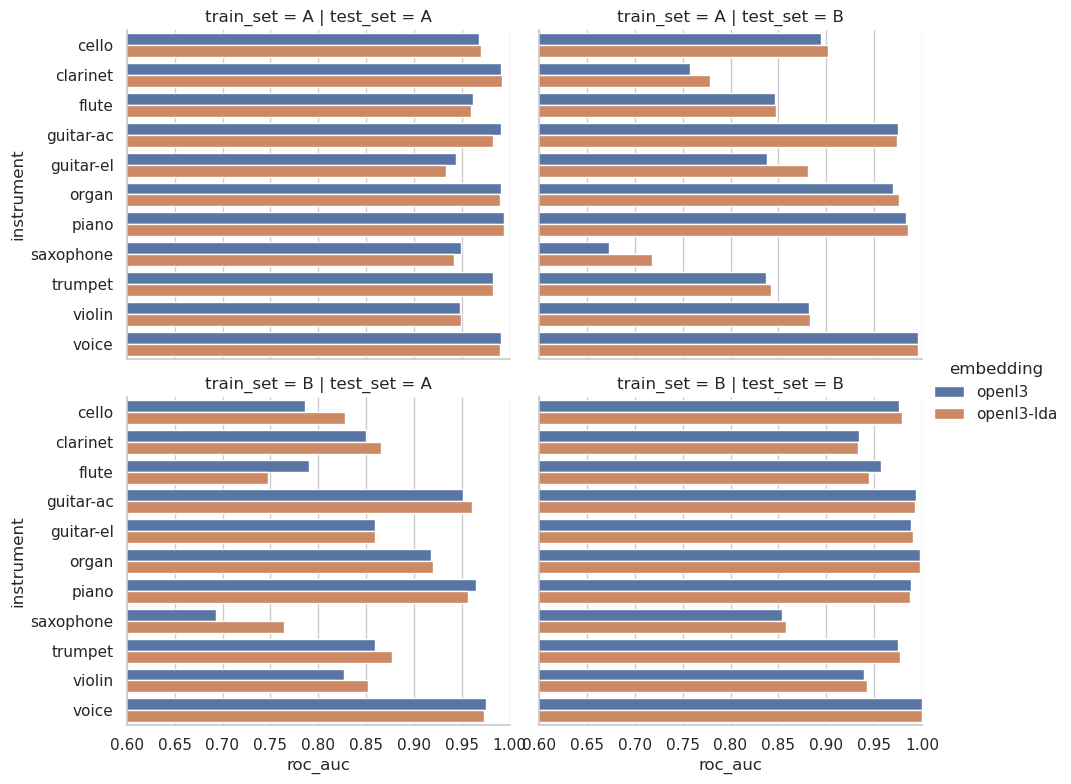

In [7]:
embedding = 'openl3'; debias_method = ''
df1 = pd.read_csv('results/results_' + embedding + debias_method + '.csv')
debias_method = '-lda'
df2 = pd.read_csv('results/results_' + embedding + debias_method + '.csv')

result_all = df1.append(df2).reset_index(drop=True)
sns.set_theme(context='notebook', style='whitegrid', palette='deep')

sns.catplot(data=result_all, row='train_set', col='test_set', y='instrument', x='roc_auc', hue='embedding', kind='bar', 
            height=4, aspect=1.2, ci=None)
plt.xlim([0.6,1])
plt.savefig('results/' + embedding  + debias_method + '.pdf', bbox_inches='tight')

## YAMNet

In [25]:
embedding = 'yamnet'
debias_method = ''

deb = deem(embedding = embedding, debias_method = debias_method, feature_dir='./embeddings.h5', 
           instrument_map=instrument_map, genre_map=genre_map, param_grid=param_grid)

A_meta = pd.read_csv("A_meta.csv")
A_feature = deb.load_feature(A_meta)
B_meta = pd.read_csv("B_meta.csv")
B_feature = deb.load_feature(B_meta)

deb.instrument_classfication(train_set='A', test_set='A', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='A', test_set='B', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='B', test_set='B', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='B', test_set='A', A_feature=A_feature, B_feature=B_feature)

deb.result_all.to_csv('results/results_' + embedding + debias_method + '.csv', index=False)
result_all = deb.result_all

100%|██████████| 6705/6705 [00:04<00:00, 1668.51it/s]


(6705, 1024) (6705,)


100%|██████████| 6705/6705 [00:03<00:00, 1685.61it/s]


(6705, 1024) (6705,)
Train on A, test on A


100%|██████████| 11/11 [00:50<00:00,  4.57s/it]


Train on A, test on B


100%|██████████| 11/11 [00:50<00:00,  4.55s/it]


Train on B, test on B


100%|██████████| 11/11 [00:39<00:00,  3.56s/it]


Train on B, test on A


100%|██████████| 11/11 [00:40<00:00,  3.67s/it]


In [26]:
debias_method = '-lda'

deb.debias_method = debias_method

deb.instrument_classfication(train_set='A', test_set='A', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='A', test_set='B', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='B', test_set='B', A_feature=A_feature, B_feature=B_feature)
deb.instrument_classfication(train_set='B', test_set='A', A_feature=A_feature, B_feature=B_feature)

deb.result_all.to_csv('results/results_' + embedding + debias_method + '.csv', index=False)
result_all = result_all.append(deb.result_all)

Train on A, test on A


100%|██████████| 11/11 [02:32<00:00, 13.90s/it]


Train on A, test on B


100%|██████████| 11/11 [02:31<00:00, 13.81s/it]


Train on B, test on B


100%|██████████| 11/11 [01:36<00:00,  8.80s/it]


Train on B, test on A


100%|██████████| 11/11 [01:31<00:00,  8.35s/it]


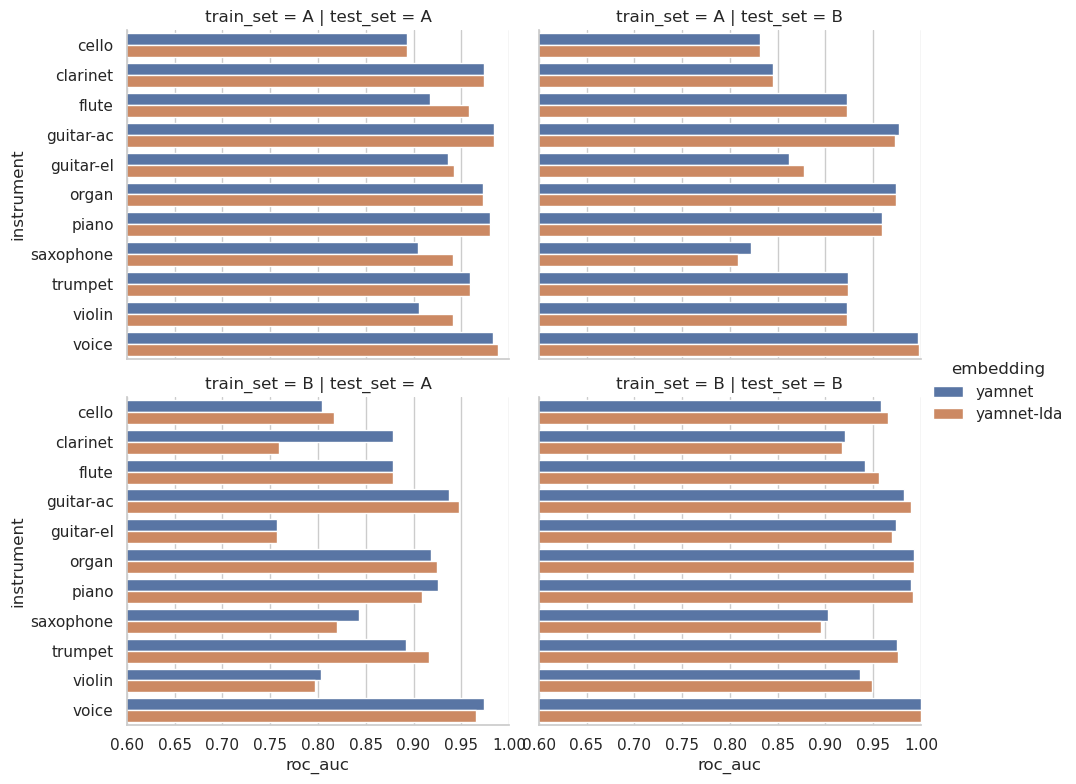

In [6]:
embedding = 'yamnet'; debias_method = ''
df1 = pd.read_csv('results/results_' + embedding + debias_method + '.csv')
debias_method = '-lda'
df2 = pd.read_csv('results/results_' + embedding + debias_method + '.csv')

result_all = df1.append(df2)
sns.set_theme(context='notebook', style='whitegrid', palette='deep')

sns.catplot(data=result_all, row='train_set', col='test_set', y='instrument', x='roc_auc', hue='embedding', kind='bar', 
            height=4, aspect=1.2, ci=None)
plt.xlim([0.6,1])
plt.savefig('results/' + embedding  + debias_method + '.pdf', bbox_inches='tight')